[View in Colaboratory](https://colab.research.google.com/github/raahatg21/CIFAR-10-Dataset-with-Keras/blob/master/CIFAR_10_2.ipynb)

# CIFAR-10 Dataset: Object Classification

Dari hasil percobaan didapatkan akurasi validasi sebesar 62%. dan 80.52% untuk testing akurasi Testing Accuracy

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
# Preprocessing the data

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [7]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
# Preprocessing the Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [9]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [10]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [11]:
# Spiltting training and validation sets

X_val = X_train[:10000]
y_val = y_train[:10000]

X_train = X_train[10000:]
y_train = y_train[10000:]

In [12]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

In [13]:
# Building the model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [15]:
# Compiling the Model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# Creating the Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [17]:
# Training

history = model.fit(X_train, y_train, epochs = 16, batch_size = 32, validation_data = (X_val, y_val), callbacks = callback)


Train on 40000 samples, validate on 10000 samples
Epoch 1/16
40000/40000 [==============================] - 49s 1ms/step - loss: 1.5347 - accuracy: 0.4771 - val_loss: 1.0292 - val_accuracy: 0.6315
Epoch 2/16
40000/40000 [==============================] - 46s 1ms/step - loss: 0.9521 - accuracy: 0.6690 - val_loss: 0.9086 - val_accuracy: 0.6731
Epoch 3/16
40000/40000 [==============================] - 46s 1ms/step - loss: 0.7906 - accuracy: 0.7258 - val_loss: 0.8217 - val_accuracy: 0.7187
Epoch 4/16
40000/40000 [==============================] - 46s 1ms/step - loss: 0.6915 - accuracy: 0.7606 - val_loss: 0.7513 - val_accuracy: 0.7501
Epoch 5/16
40000/40000 [==============================] - 46s 1ms/step - loss: 0.6214 - accuracy: 0.7869 - val_loss: 0.6548 - val_accuracy: 0.7739
Epoch 6/16
40000/40000 [==============================] - 46s 1ms/step - loss: 0.5697 - accuracy: 0.8058 - val_loss: 0.6286 - val_accuracy: 0.7850
Epoch 7/16
40000/40000 [==============================] - 45s 1ms/s

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

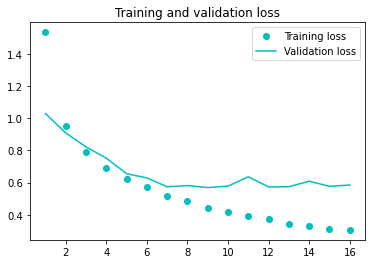

In [27]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

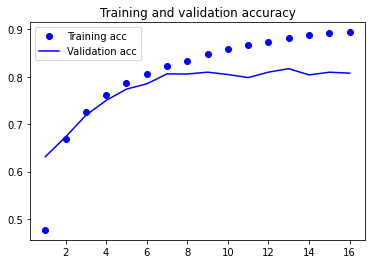

In [28]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [23]:
# Testing

test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

10000/10000 [==============================] - 3s 331us/step


(0.620137516784668, 0.7942000031471252)